## Customer ChurnPrediction Project

## The task is to anaylyze the dataset  of a telecom company build a machine learning model to predict customer churn for a telecom company and provide  recommendations to improve the churn.


### Importing necessary libraries and dataset

In [1]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Exploration

In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe(include="O")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
data["tenure"].value_counts()


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

<Axes: xlabel='tenure', ylabel='count'>

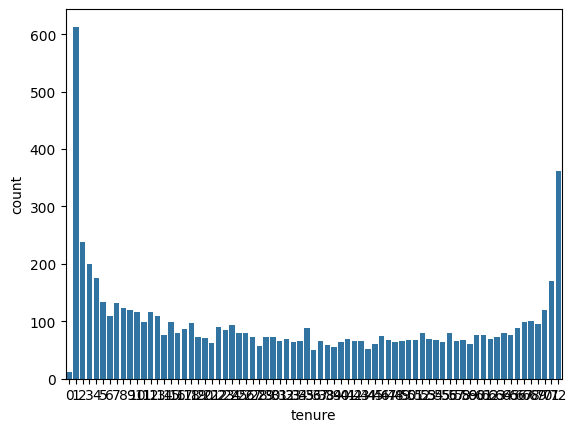

In [10]:
sns.countplot(x=data["tenure"],data=data)


## Exploratory Data Analysis

<Axes: xlabel='Churn', ylabel='count'>

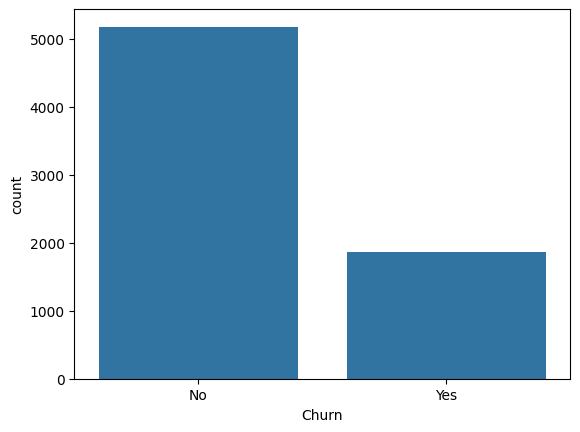

In [11]:
sns.countplot(x=data["Churn"],data=data)

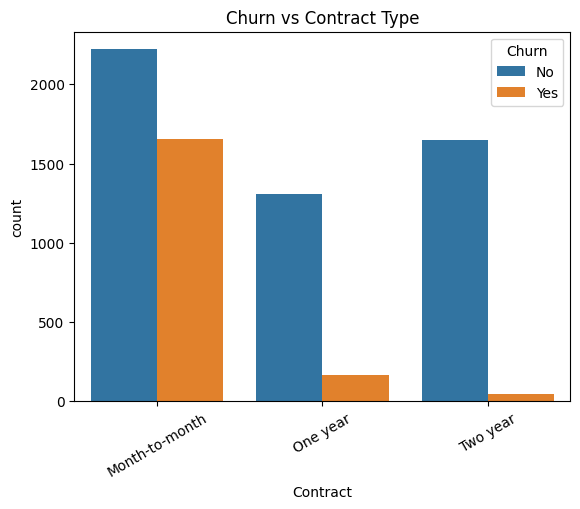

In [12]:
# Churn vs Contract
sns.countplot(x="Contract",hue="Churn",  data=data)
plt.xticks(rotation=30)
plt.title("Churn vs Contract Type")
plt.show()

### This shows that almost 44% of customers having month-to-month contract type leave the service while the churn rate for customers having one-year is around 14% and those with two-year contract is very low.

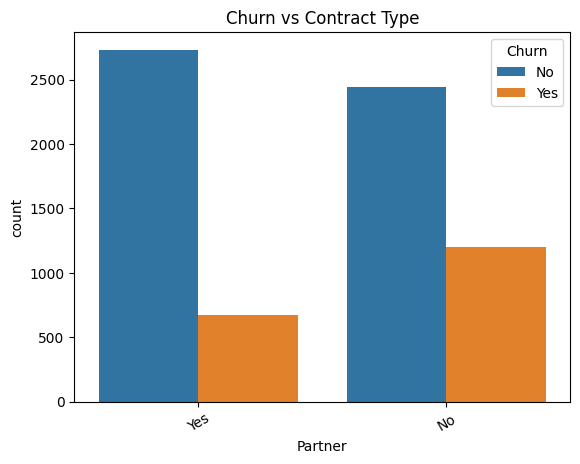

In [13]:
# Churn vs Partner
sns.countplot(x="Partner",hue="Churn",  data=data)
plt.xticks(rotation=30)
plt.title("Churn vs Contract Type")
plt.show()

In [14]:
# Count churned vs non-churned by SeniorCitizen
ratio = (
    data
    .groupby("SeniorCitizen")["Churn"]
    .value_counts(normalize=True)
    .rename("ratio")
    .reset_index()
)

print(ratio)


   SeniorCitizen Churn     ratio
0              0    No  0.763938
1              0   Yes  0.236062
2              1    No  0.583187
3              1   Yes  0.416813


### It demonstrates that SeniorCitizens have higher churn rate than JuniorCitizens .So older users are more likelyto leave than junior ones.

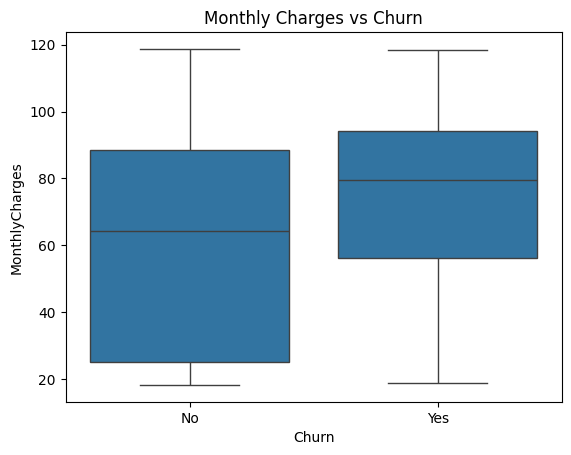

In [15]:
# Monthly Charges vs Churn
sns.boxplot(x="Churn", y="MonthlyCharges", data=data)
plt.title("Monthly Charges vs Churn")
plt.show()

### The median monthly charge for churned customers is noticeably higher than for non-churned customers which means that Customers who churned (Yes) generally have higher monthly charges than those who did not churn.

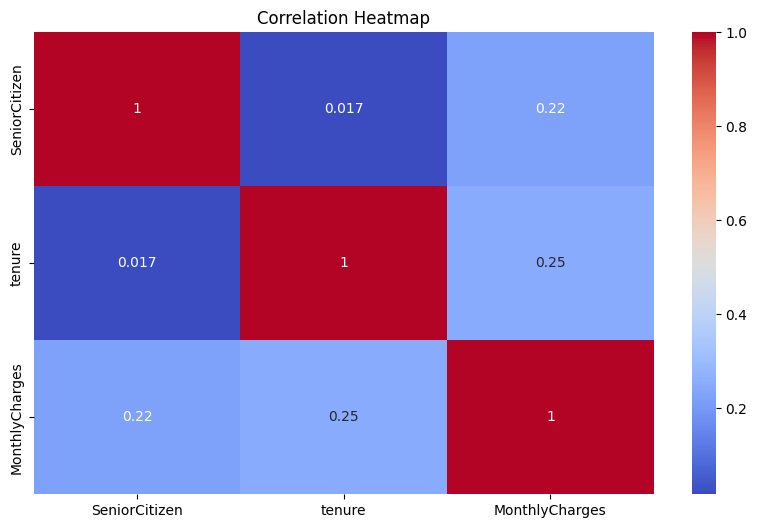

In [16]:
#correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Data Preprocessing

In [17]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
data.duplicated().any()

False

In [19]:
#Encoding Categorical variables
le=LabelEncoder()
for col in data.columns:
    if data[col].dtype=="object":
        data[col]=le.fit_transform(data[col])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


## Feature Selection and dataset splitting

In [21]:
X=data.drop("Churn",axis=1)
y=data["Churn"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Feature Scaling and Model Training

In [29]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

LR=LogisticRegression()
LR.fit(X_train,y_train)
LR_Predict=LR.predict(X_test)

print("Logistic Regression Accuracy",accuracy_score(y_test,LR_Predict))
print(classification_report(y_test,LR_Predict))

#DecisionTreeClassifier

DT=DecisionTreeClassifier(random_state=42)
DT.fit(X_train,y_train)
DT_Predict=DT.predict(X_test)


print("Decision Tree Accuracy",accuracy_score(y_test,DT_Predict))
print(classification_report(y_test,DT_Predict))

#RandomForest Classifier

RF=RandomForestClassifier(n_estimators=100,random_state=42)
RF.fit(X_train,y_train)
RF_Predict=DT.predict(X_test)


print("Random Foresr Accuracy",accuracy_score(y_test,RF_Predict))
print(classification_report(y_test,RF_Predict))

Logistic Regression Accuracy 0.8147622427253371
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409

Decision Tree Accuracy 0.7175301632363378
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.47      0.47      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409

Random Foresr Accuracy 0.7175301632363378
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.47      0.47      0.47       373

    accuracy                           0.72      1

### Estimating Feature importance using Random Forest and Logistic Regression

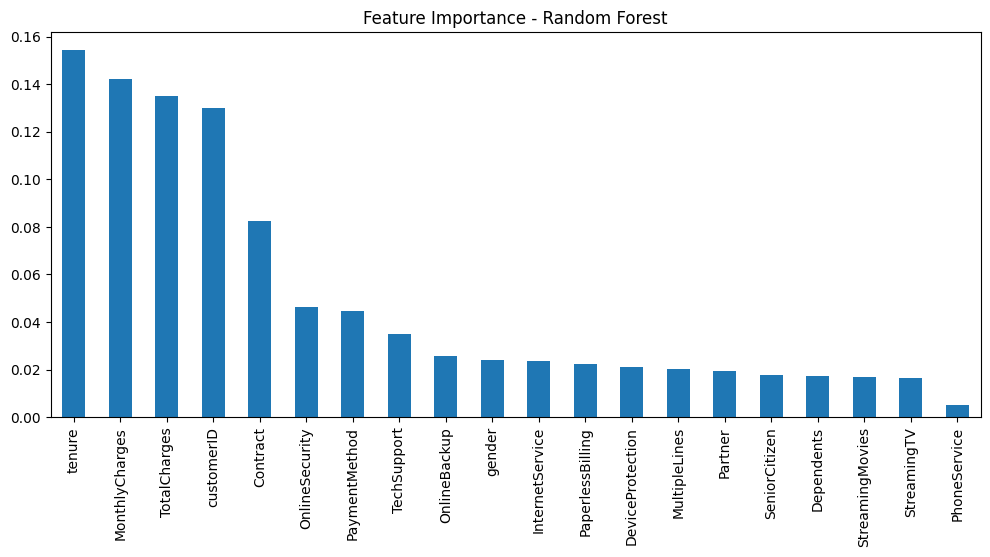

In [31]:
feature_importance = pd.Series(
    RF.feature_importances_, index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind="bar", figsize=(12, 5))
plt.title("Feature Importance - Random Forest")
plt.show()

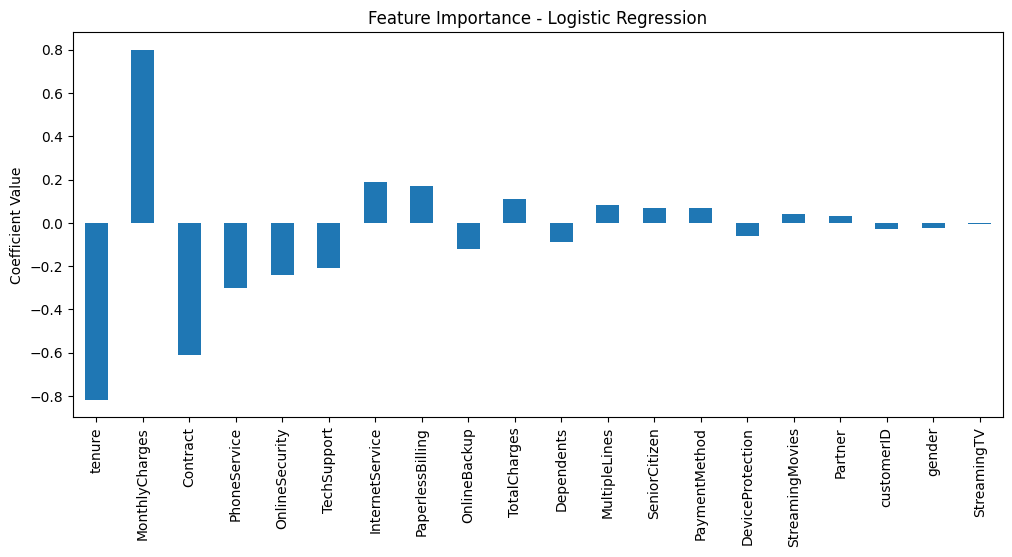

In [34]:
# Get coefficients from Logistic Regression
feature_importance = pd.Series(
    LR.coef_[0], index=X.columns
).sort_values(key=abs, ascending=False)

# Plot
feature_importance.plot(kind="bar", figsize=(12, 5))
plt.title("Feature Importance - Logistic Regression")
plt.ylabel("Coefficient Value")
plt.show()


### From the above plot, it is clear that Customer churn is primarily influenced by tenure, monthly charges, and contract type.
### 1. Customers with longer tenure are much less likely to churn.
### 2. Higher monthly charges increase churn probability.
### 3.Long-term contracts reduce churn compared to month-to-month plans.